In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ファイルの読み込み
stock_data = []
stock_data_file = open("../data/stock-price.txt", "r")
for line in stock_data_file:
    line = line.rstrip()
    stock_data.append(float(line))
stock_data_file.close()

In [3]:
# データの確認
# print (stock_data)
count_s = len(stock_data)
# print (count_s)

In [4]:
# 株価の上昇率を算出、おおよそ-1.0-1.0の範囲に収まるように調整
modified_data = []
for i in range(1, count_s):
    modified_data.append(float(stock_data[i] - stock_data[i-1])/float(stock_data[i-1]) * 20)
# print (modified_data)
count_m = len(modified_data)
# print (count_m)

In [5]:
# 前日までの4連続の上昇率のデータ
successive_data = []
# 正解値 価格上昇: 1 価格低下: 0
answers = []
for i in range(4, count_m):
    successive_data.append([modified_data[i-4], modified_data[i-3], modified_data[i-2], modified_data[i-1]])
    if modified_data[i] > 0:
        answers.append(1)
    else:
        answers.append(0)
# print (successive_data)
# print (answers)

# データ数
n = len(successive_data)
# print (n)
m = len(answers)
# print (m)

In [6]:
#successive_data,answers
len(successive_data),len(answers)

(1995, 1995)

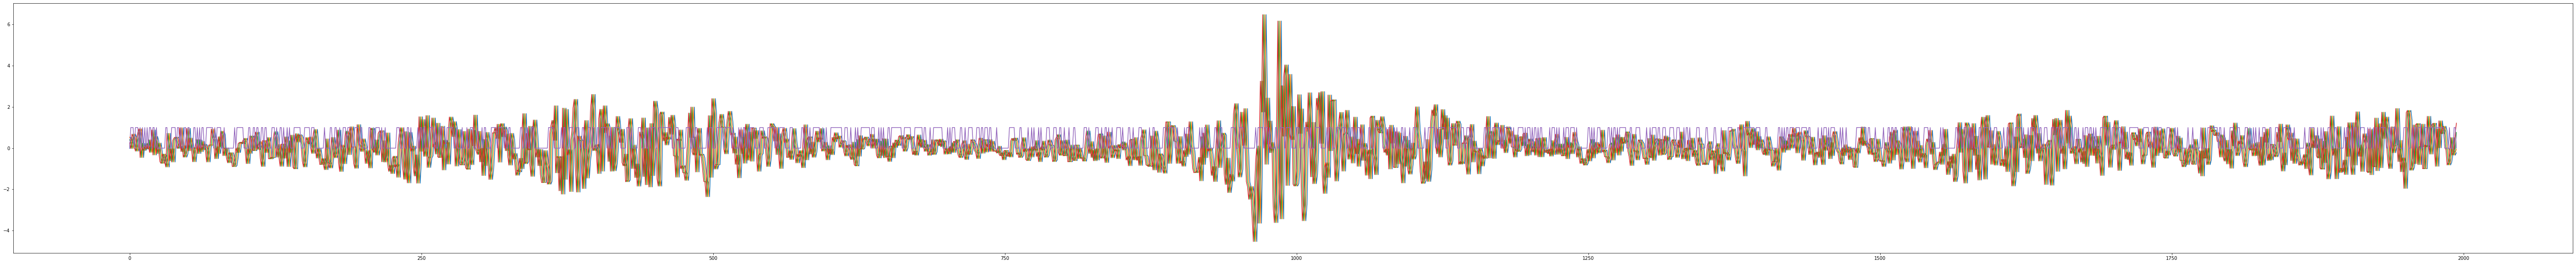

In [7]:
plt.figure(figsize=(100,10))
plt.plot(successive_data)
plt.plot(answers)

In [8]:
# 線形サポートベクターマシーン
clf = svm.LinearSVC()
# サポートベクターマシーンによる訓練 （データの75%を訓練に使用）
clf.fit(successive_data[:n*75//100], answers[:n*75//100])

C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [9]:
# テスト用データ
# 正解
expected = answers[-n*25//100:]
# 予測
predicted = clf.predict(successive_data[-n*25//100:])

# 末尾の10個を比較
print (expected[-10:])
print (list(predicted[-10:]))

# 正解率の計算
correct = 0.0
wrong = 0.0
for i in range(n*25//100):
    if expected[i] == predicted[i]:
        correct += 1
    else:
        wrong += 1
print ("正解率: " + str(correct / (correct+wrong) * 100) + "%")

[0, 0, 0, 1, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
正解率: 55.62248995983936%
